In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Veri seti boyutu: (20640, 8)
Özellikler: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


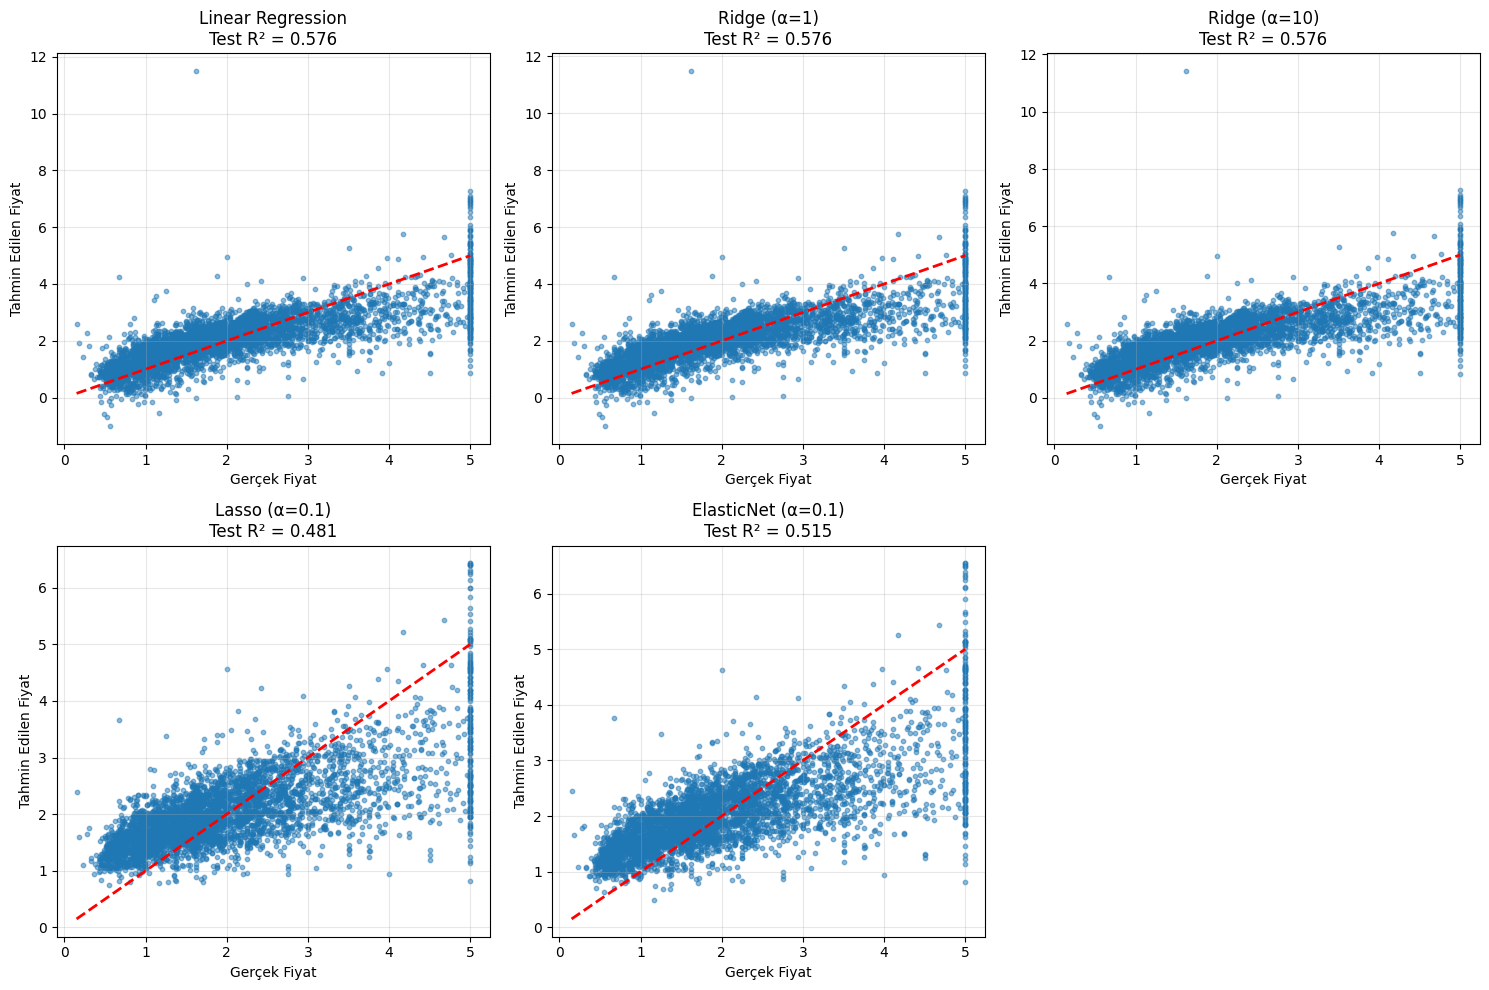


Model                Train MSE    Test MSE     Train R²   Test R²   
Linear Regression    0.5179       0.5559       0.6126     0.5758    
Ridge (α=1)          0.5179       0.5559       0.6126     0.5758    
Ridge (α=10)         0.5179       0.5555       0.6125     0.5761    
Lasso (α=0.1)        0.6718       0.6796       0.4974     0.4814    
ElasticNet (α=0.1)   0.6273       0.6359       0.5308     0.5148    


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  
import matplotlib.pyplot as plt  

# Veri setini yükle
housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target

print(f"Veri seti boyutu: {X_housing.shape}")
print(f"Özellikler: {housing.feature_names}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

# Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Farklı modelleri karşılaştır
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1)': Ridge(alpha=1),
    'Ridge (α=10)': Ridge(alpha=10),
    'Lasso (α=0.1)': Lasso(alpha=0.1),
    'ElasticNet (α=0.1)': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}
plt.figure(figsize=(15, 10))

for idx, (name, model) in enumerate(models.items(), 1):
    # Model eğitimi
    model.fit(X_train_scaled, y_train)
    
    # Tahminler
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Metrikler
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }
    
    # Tahmin vs Gerçek grafiği
    plt.subplot(2, 3, idx)
    plt.scatter(y_test, y_test_pred, alpha=0.5, s=10)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Gerçek Fiyat')
    plt.ylabel('Tahmin Edilen Fiyat')
    plt.title(f'{name}\nTest R² = {test_r2:.3f}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Sonuçları tablo olarak göster
print("\n" + "="*70)
print(f"{'Model':<20} {'Train MSE':<12} {'Test MSE':<12} {'Train R²':<10} {'Test R²':<10}")
print("="*70)
for name, metrics in results.items():
    print(f"{name:<20} {metrics['train_mse']:<12.4f} {metrics['test_mse']:<12.4f} "
          f"{metrics['train_r2']:<10.4f} {metrics['test_r2']:<10.4f}")

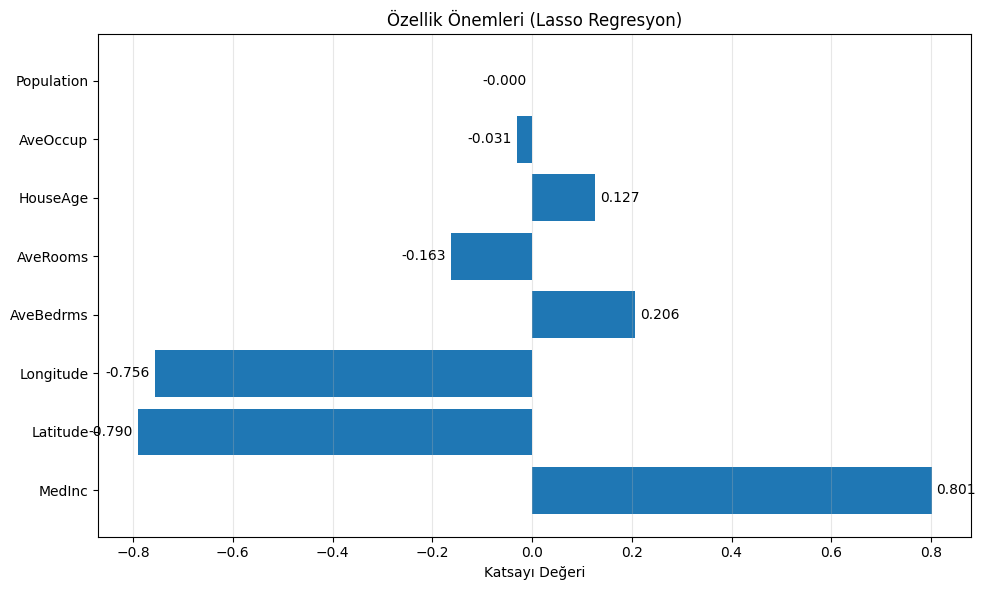


En önemli 3 özellik:
- MedInc: 0.801
- Latitude: -0.790
- Longitude: -0.756


In [3]:
import pandas as pd
import numpy as np

# En önemli özellikleri bul
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_scaled, y_train)

# Katsayıları görselleştir
feature_importance = pd.DataFrame({
    'feature': housing.feature_names,
    'coefficient': lasso_model.coef_,
    'abs_coefficient': np.abs(lasso_model.coef_)
}).sort_values('abs_coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['coefficient'].values)
plt.yticks(range(len(feature_importance)), feature_importance['feature'].values)
plt.xlabel('Katsayı Değeri')
plt.title('Özellik Önemleri (Lasso Regresyon)')
plt.grid(True, alpha=0.3, axis='x')

for i, v in enumerate(feature_importance['coefficient'].values):
    plt.text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
            va='center', ha='left' if v > 0 else 'right')

plt.tight_layout()
plt.show()

print("\nEn önemli 3 özellik:")
for i, row in feature_importance.head(3).iterrows():
    print(f"- {row['feature']}: {row['coefficient']:.3f}")